In [1]:
from replication_utils import train_solodoch
import matplotlib.pyplot as plt
import numpy as np
import torch as t
device = "cuda" if t.cuda.is_available() else "cpu"
t.manual_seed(123456)

device: cuda
167 parameters.


100%|██████████| 50000/50000 [03:39<00:00, 227.29it/s]


device: cuda
577 parameters.


100%|██████████| 50000/50000 [03:56<00:00, 211.07it/s]


device: cuda
709 parameters.


100%|██████████| 50000/50000 [03:55<00:00, 212.10it/s]


device: cuda
723 parameters.


100%|██████████| 50000/50000 [03:31<00:00, 236.32it/s]


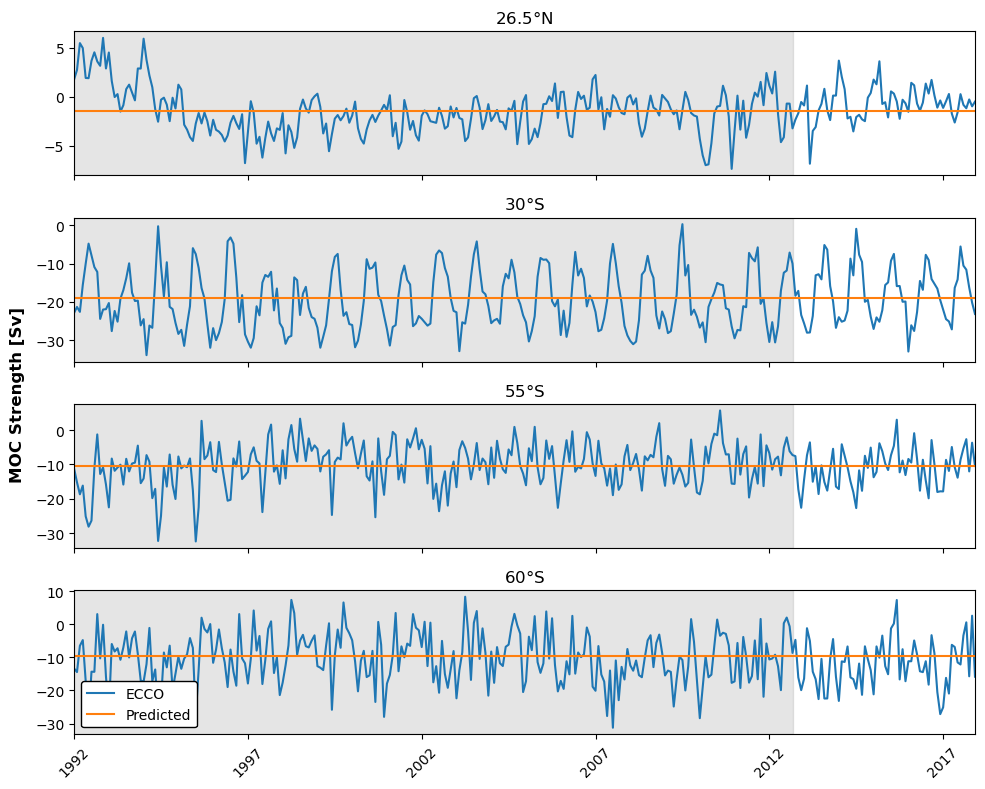

[1.860075233742739, 7.062417899135625, 5.484218323472073, 7.638531044949559]
[229.82135009765625, 75.8428726196289, 73.16741180419922, 187.2361297607422]
[98.75202941894531, 75.84286499023438, 73.16741943359375, 107.28113555908203]


In [2]:
sections = ["26N", "30S", "55S", "60S"]
RMSE = []
MAPE = []
MAPE_ = []
Y_PRED = []
Y_TRUE = []
for section in sections:
    rmse, mape, mape_, y_pred, y_true = train_solodoch(section, False, "solodoch", device=device)
    RMSE.append(rmse)
    MAPE.append(mape)
    MAPE_.append(mape_)
    Y_PRED.append(y_pred)
    Y_TRUE.append(y_true)

fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, squeeze=True, figsize=(10, 8))
titles = [f"26.5$\\degree$N", f"30$\\degree$S", f"55$\\degree$S", f"60$\\degree$S"]
for ax, moc, full_pred, section, plot_title in zip(axs, Y_TRUE, Y_PRED, sections, titles):
    ax.plot(moc, label="ECCO")
    ax.plot(full_pred, label="Predicted")
    y_lower, y_upper = ax.get_ylim()
    x_pos = np.arange(int(0.8*312))
    ax.fill_between(x = x_pos, 
                    y1 = np.repeat(y_lower, len(x_pos)), 
                    y2 = np.repeat(y_upper, len(x_pos)),
                    alpha = 0.2, 
                    color = 'gray')
    ax.margins(x = 0, y = 0)
    ax.set_title(plot_title)
ax.set_xticks(np.arange(0, 324, 60), np.arange(1992, 2019, 5), rotation=45)
ax.legend(loc = 'lower left', edgecolor = 'black', framealpha = 1)
fig.supylabel("MOC Strength [Sv]", weight="bold")
plt.tight_layout()
plt.savefig("rawmoc.png", dpi=400)
plt.show()
print(RMSE)
print(MAPE)
print(MAPE_)

device: cuda
167 parameters.


100%|██████████| 50000/50000 [03:14<00:00, 256.91it/s]


device: cuda
577 parameters.


100%|██████████| 50000/50000 [04:01<00:00, 207.29it/s]


device: cuda
709 parameters.


100%|██████████| 50000/50000 [06:21<00:00, 131.06it/s]


device: cuda
723 parameters.


100%|██████████| 50000/50000 [06:03<00:00, 137.58it/s]


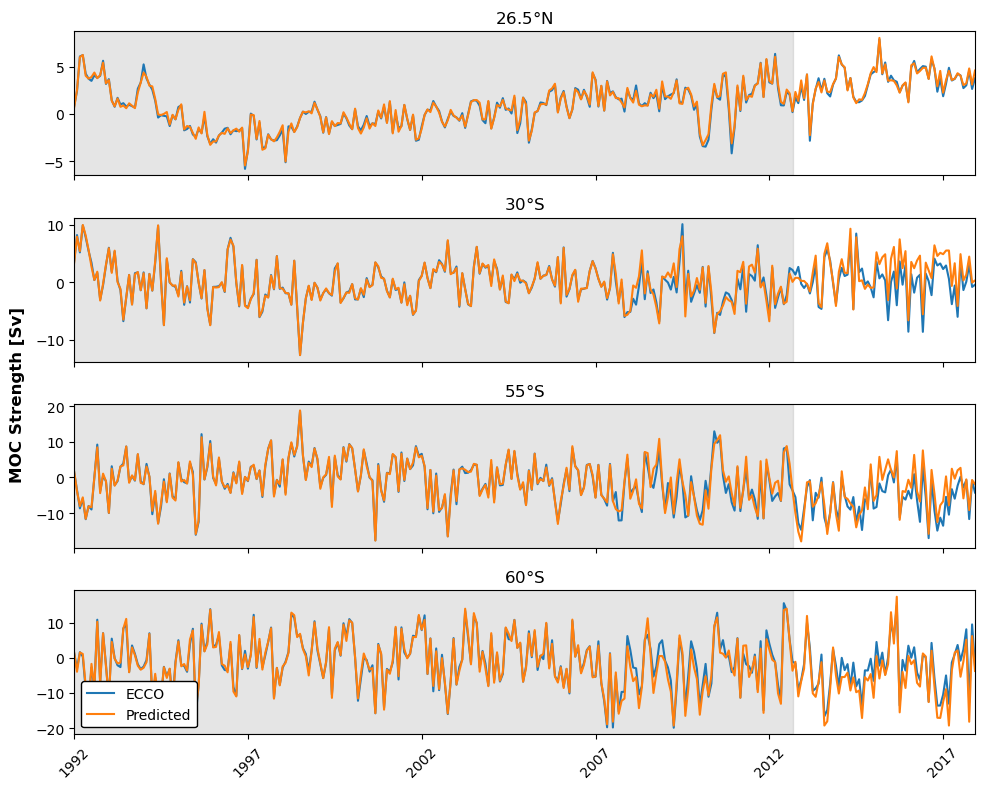

[0.29604608267117366, 2.2333224082087177, 3.2786632857676183, 2.843670441011598]
[7.908918985305331, 549.8997628778659, 148.6579385233842, 1125.6083472571038]
[7.9089189853053306, 115.53219266484003, 80.72003014432018, 78.01619974092152]


In [3]:
sections = ["26N", "30S", "55S", "60S"]
RMSE = []
MAPE = []
MAPE_ = []
Y_PRED = []
Y_TRUE = []
for section in sections:
    rmse, mape, mape_, y_pred, y_true = train_solodoch(section, True, "solodoch", device=device)
    RMSE.append(rmse)
    MAPE.append(mape)
    MAPE_.append(mape_)
    Y_PRED.append(y_pred)
    Y_TRUE.append(y_true)

fig, axs = plt.subplots(nrows=4, ncols=1, sharex=True, squeeze=True, figsize=(10, 8))
titles = [f"26.5$\\degree$N", f"30$\\degree$S", f"55$\\degree$S", f"60$\\degree$S"]
for ax, moc, full_pred, section, plot_title in zip(axs, Y_TRUE, Y_PRED, sections, titles):
    ax.plot(moc, label="ECCO")
    ax.plot(full_pred, label="Predicted")
    y_lower, y_upper = ax.get_ylim()
    x_pos = np.arange(int(0.8*312))
    ax.fill_between(x = x_pos, 
                    y1 = np.repeat(y_lower, len(x_pos)), 
                    y2 = np.repeat(y_upper, len(x_pos)),
                    alpha = 0.2, 
                    color = 'gray')
    ax.margins(x = 0, y = 0)
    ax.set_title(plot_title)
ax.set_xticks(np.arange(0, 324, 60), np.arange(1992, 2019, 5), rotation=45)
ax.legend(loc = 'lower left', edgecolor = 'black', framealpha = 1)
fig.supylabel("MOC Strength [Sv]", weight="bold")
plt.tight_layout()
plt.savefig("predictions.png", dpi=400)
plt.show()
print(RMSE)
print(MAPE)
print(MAPE_)